In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-pastel')

In [2]:
data=pd.read_csv('laptop_data.csv')

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


#### we can see that we have an unwanted column Unnamed: 0

In [4]:
## Droping the unnamed: 0 column
data.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
data.shape

(1303, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [7]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<AxesSubplot:>

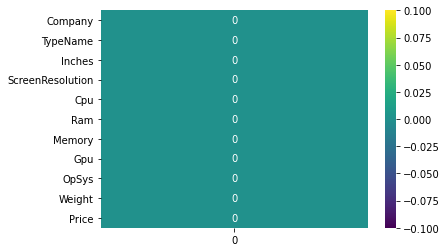

In [8]:
## Plotting heatmap of null values
nan=data.isnull().sum().to_frame()
sns.heatmap(nan,annot=True,cmap='viridis')

In [9]:
## Checking duplicated values
data.duplicated().sum()

29

In [10]:
data[data.duplicated()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.1200
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.5200
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,15397.9200
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,20193.1200
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496


In [11]:
data.drop_duplicates(keep='first',inplace=True)

In [12]:
data.shape

(1274, 11)

In [13]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [14]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


#### Coverting Ram and weight column into integer and float value

In [15]:
x=data.copy()

In [16]:
x['Ram']=data['Ram'].str.replace('GB','').astype('int32')
x['Weight']=data['Weight'].str.replace('kg','').astype('float64')

In [17]:
x.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

## EDA

<AxesSubplot:xlabel='Price', ylabel='Density'>

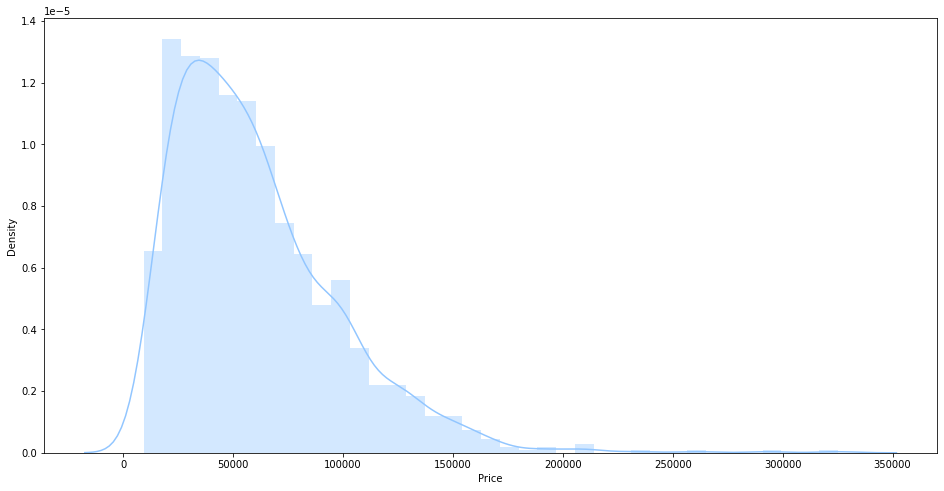

In [18]:
## Distribution of the Price
fig,ax=plt.subplots(figsize=(16,8))
sns.distplot(data['Price'])

In [19]:
data['Company'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Fujitsu        3
LG             3
Chuwi          3
Google         3
Huawei         2
Name: Company, dtype: int64

Text(0.5, 1.0, 'Laptop Count(CompanyWise)')

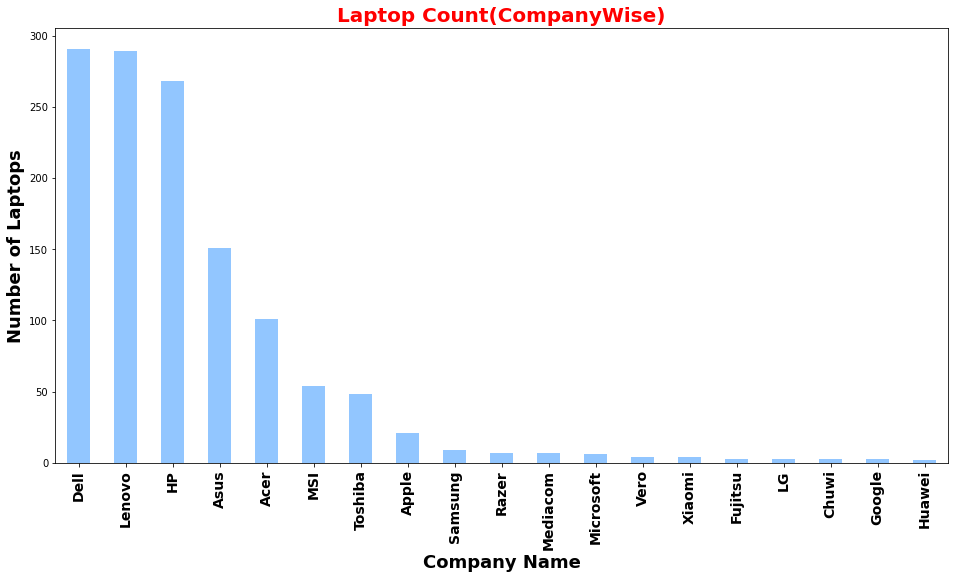

In [20]:
data['Company'].value_counts().plot(kind='bar',figsize=(16,8))
plt.xlabel('Company Name',fontsize=18,fontweight='bold')
plt.ylabel('Number of Laptops',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14)
plt.title('Laptop Count(CompanyWise)',fontsize=20,fontweight='bold',color='red')  

In [21]:
data['TypeName'].value_counts()

Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: TypeName, dtype: int64

Text(0.5, 1.0, 'Laptop Type')

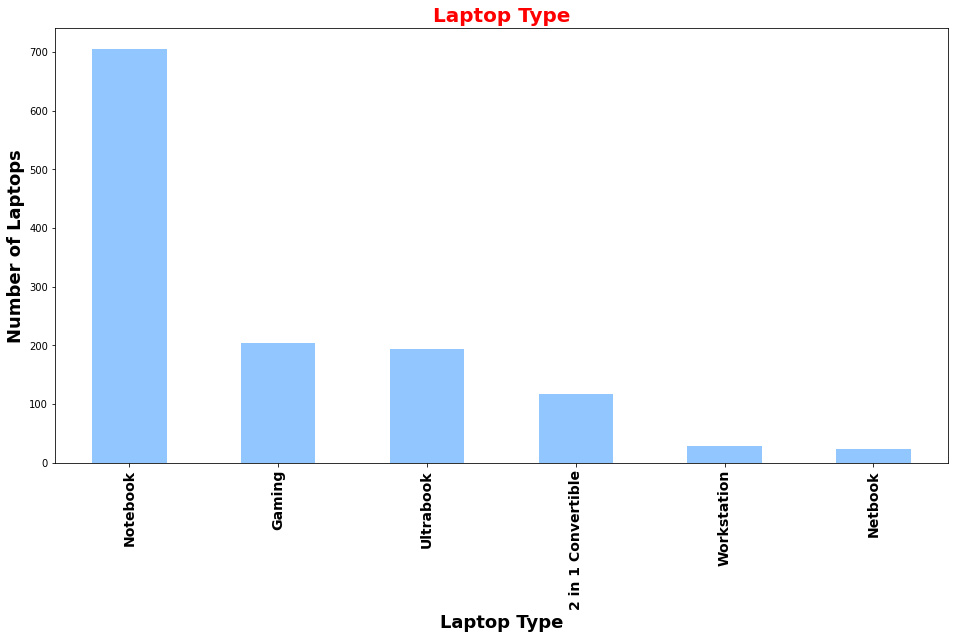

In [22]:
data['TypeName'].value_counts().plot(kind='bar',figsize=(16,8))
plt.xlabel('Laptop Type',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14)
plt.ylabel('Number of Laptops',fontsize=18,fontweight='bold')
plt.title('Laptop Type',fontsize=20,fontweight='bold',color='red')                    

Text(0.5, 1.0, 'Price Vs Company')

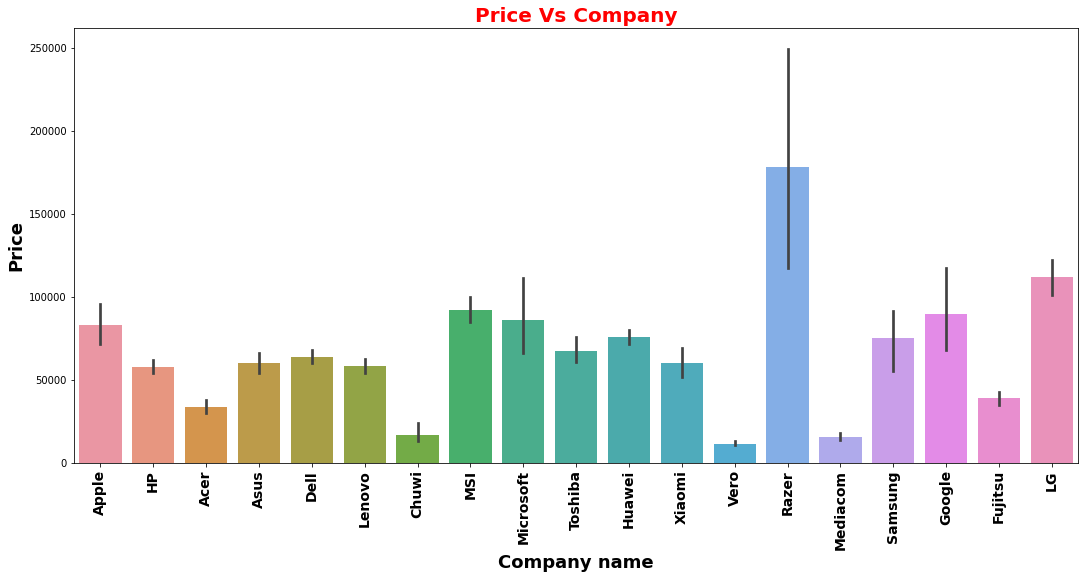

In [23]:
## Company vs Price
fig,ax=plt.subplots(figsize=(18,8))
ax=sns.barplot(data=data,
           x='Company',
           y='Price')
ax.set_xlabel('Company name',fontsize=18,fontweight='bold')
ax.set_ylabel('Price',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14,rotation=90)
ax.set_title('Price Vs Company',fontsize=20,fontweight='bold',color='red')

Text(0.5, 1.0, 'Price Vs Type of Laptop')

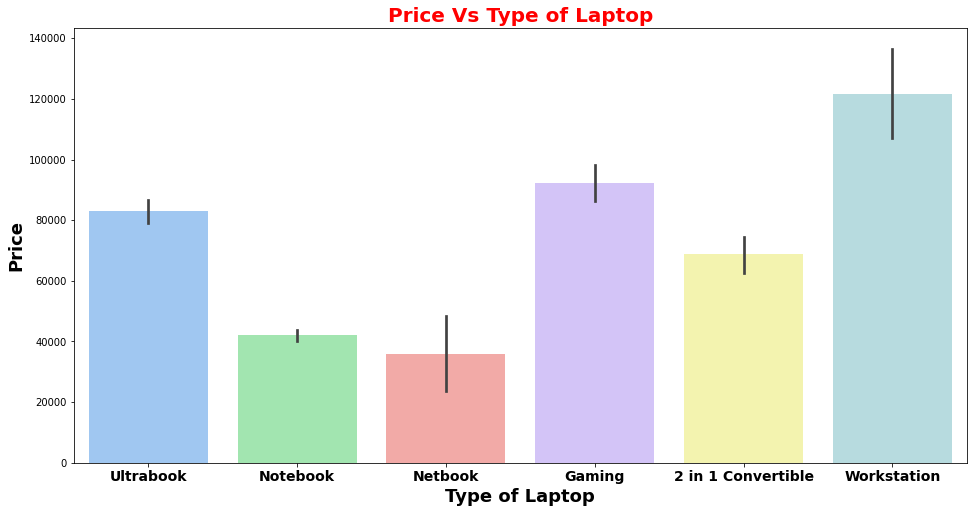

In [24]:
## TypeName vs Price
fig,ax=plt.subplots(figsize=(16,8))
ax=sns.barplot(data=data,
           x='TypeName',
           y='Price')
ax.set_xlabel('Type of Laptop',fontsize=18,fontweight='bold')
ax.set_ylabel('Price',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14)
ax.set_title('Price Vs Type of Laptop',fontsize=20,fontweight='bold',color='red')

Text(0.5, 1.0, 'Price Vs Ram')

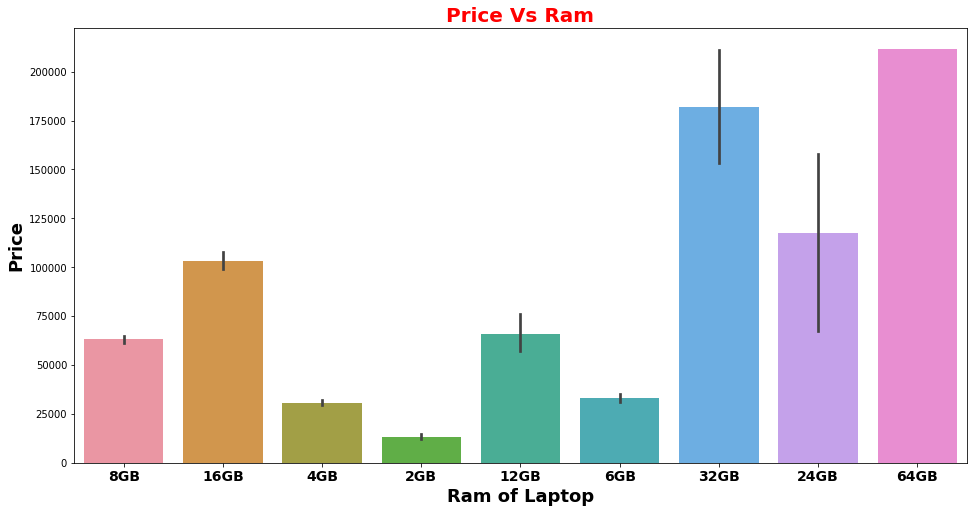

In [25]:
## Ram vs Price
fig,ax=plt.subplots(figsize=(16,8))
ax=sns.barplot(data=data,
           x='Ram',
           y='Price')
ax.set_xlabel('Ram of Laptop',fontsize=18,fontweight='bold')
ax.set_ylabel('Price',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14)
ax.set_title('Price Vs Ram',fontsize=20,fontweight='bold',color='red')

In [26]:
data['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

Text(0.5, 1.0, 'Operating System')

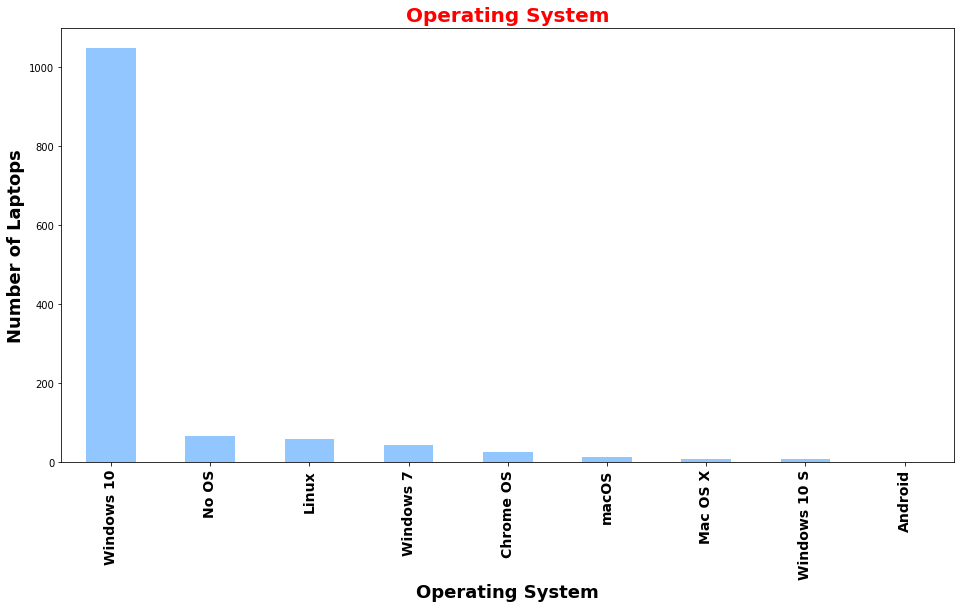

In [27]:
data['OpSys'].value_counts().plot(kind='bar',figsize=(16,8))
plt.xlabel('Operating System',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14)
plt.ylabel('Number of Laptops',fontsize=18,fontweight='bold')
plt.title('Operating System',fontsize=20,fontweight='bold',color='red')                    

Text(0.5, 1.0, 'Price Vs Type of Laptop')

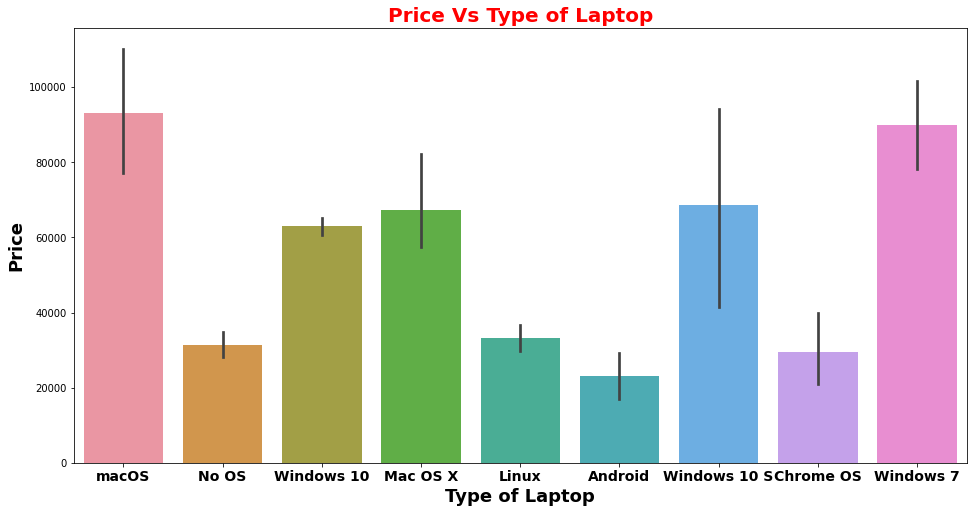

In [28]:
## Operating System Vs Price
fig,ax=plt.subplots(figsize=(16,8))
ax=sns.barplot(data=data,
           x='OpSys',
           y='Price')
ax.set_xlabel('Type of Laptop',fontsize=18,fontweight='bold')
ax.set_ylabel('Price',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14)
ax.set_title('Price Vs Type of Laptop',fontsize=20,fontweight='bold',color='red')

In [29]:
x.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


#### Lets analyse the Cpu Column

In [30]:
x['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Atom x5-Z8300 1.44GHz      1
Intel Core M m7-6Y75 1.2GHz      1
Intel Core i5 7200U 2.70GHz      1
Intel Core i5 7200U 2.7GHz       1
Intel Core i7 7700HQ 2.7GHz      1
Name: Cpu, Length: 118, dtype: int64

In [31]:
x['cpu_processor']=x['Cpu'].apply(lambda x : x.split()[0:3])
x['cpu_processor']=x['cpu_processor'].apply(lambda x : ' '.join(x))

In [32]:
x['cpu_processor'].value_counts()

Intel Core i7               515
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           69
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
AMD Ryzen 1700                3
Intel Pentium Dual            3
AMD A9-Series A9-9420         2
AMD A6-Series A6-9220         2
AMD A10-Series 9620P          2
AMD E-Series 7110             2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
Intel Xeon E3-1535M           2
AMD A10-Series 9600P          2
Intel Atom X5-Z8350           2
AMD A9-Series 9410            1
AMD FX 9830P                  1
Samsung Cortex A72&A53        1
AMD E-Series 6110             1
AMD FX 8800P                  1
AMD A12-Series 9700P          1
AMD E-Se

In [33]:
def processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [34]:
x['cpu_processor']=x['cpu_processor'].apply(processor)

In [35]:
x['cpu_processor'].value_counts()

Intel Core i7            515
Intel Core i5            423
Other Intel Processor    141
Intel Core i3            134
AMD Processor             61
Name: cpu_processor, dtype: int64

Text(0.5, 1.0, 'Processor Count')

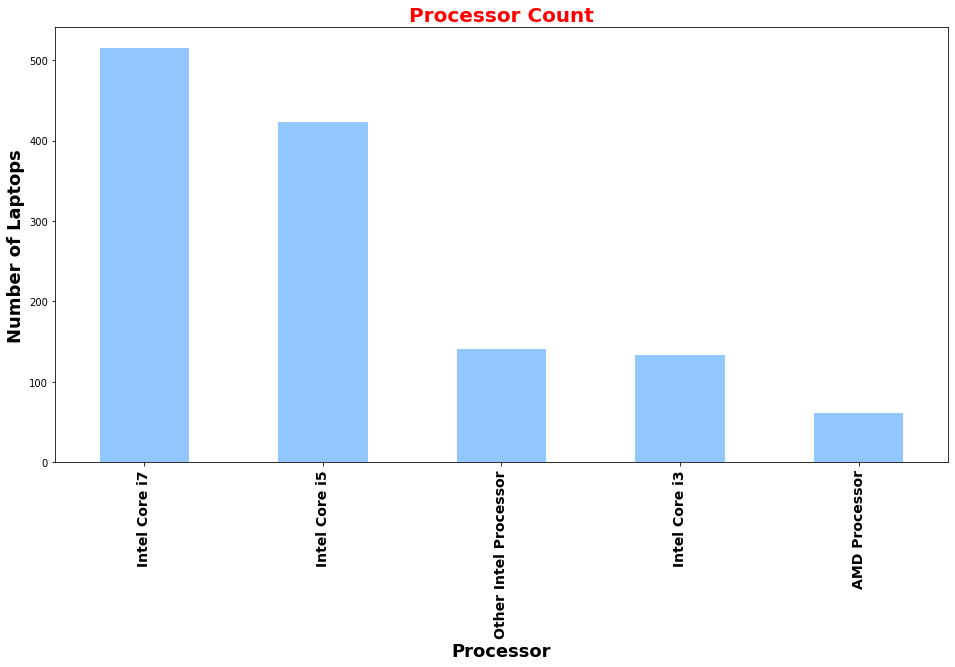

In [36]:
x['cpu_processor'].value_counts().plot(kind='bar',figsize=(16,8))
plt.xlabel('Processor',fontsize=18,fontweight='bold')
plt.ylabel('Number of Laptops',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14)
plt.title('Processor Count',fontsize=20,fontweight='bold',color='red')

Text(0.5, 1.0, 'Price Vs Processor of Laptop')

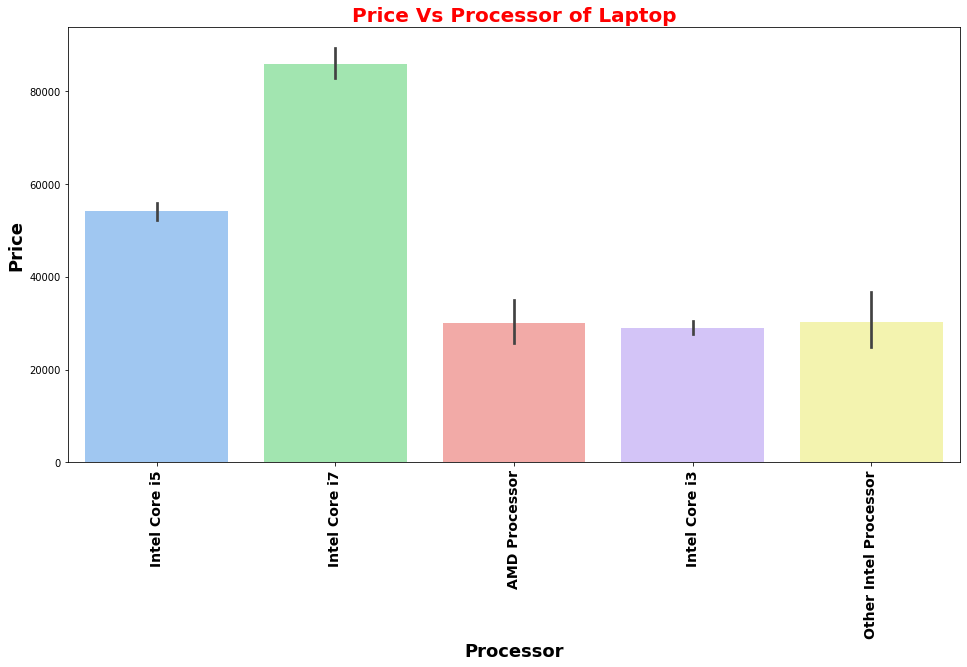

In [37]:
## Processor vs Price
fig,ax=plt.subplots(figsize=(16,8))
ax=sns.barplot(data=x,
           x='cpu_processor',
           y='Price')
ax.set_xlabel('Processor',fontsize=18,fontweight='bold')
ax.set_ylabel('Price',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14,rotation=90)
ax.set_title('Price Vs Processor of Laptop',fontsize=20,fontweight='bold',color='red')

In [38]:
x.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_processor
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5


#### Lets Analyze Screen Resolution

In [39]:
x['ScreenResolution'].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel 2560x1440                           

In [40]:
def touch(text):
    if 'Touchscreen' in text:
        return 1
    else:
        return 0

In [41]:
def IPS(text):
    if 'IPS' in text:
        return 1
    else:
        return 0

In [42]:
x['TouchScreen']=x['ScreenResolution'].apply(touch)
x['IPS']=x['ScreenResolution'].apply(IPS)

In [43]:
x['TouchScreen'].value_counts()

0    1086
1     188
Name: TouchScreen, dtype: int64

Text(0.5, 1.0, 'Count Of TouchScreen Laptop')

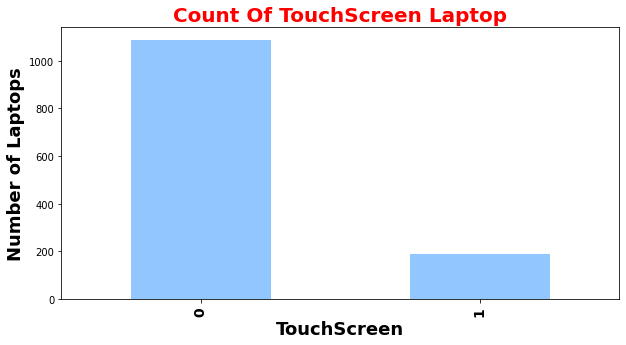

In [44]:
x['TouchScreen'].value_counts().plot(kind='bar',figsize=(10,5))
plt.xlabel('TouchScreen',fontsize=18,fontweight='bold')
plt.ylabel('Number of Laptops',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14)
plt.title('Count Of TouchScreen Laptop',fontsize=20,fontweight='bold',color='red')

Text(0.5, 1.0, 'Price Vs Touchscreen Laptop')

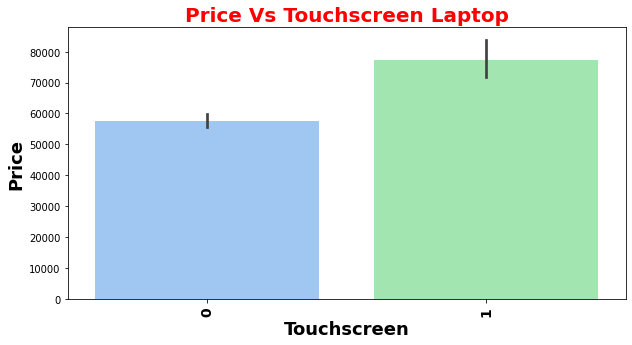

In [45]:
## TouchScreen Laptop Vs Price
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(data=x,
           x='TouchScreen',
           y='Price')
ax.set_xlabel('Touchscreen',fontsize=18,fontweight='bold')
ax.set_ylabel('Price',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14,rotation=90)
ax.set_title('Price Vs Touchscreen Laptop',fontsize=20,fontweight='bold',color='red')

Text(0.5, 1.0, 'Count Of IPS Screen Laptop')

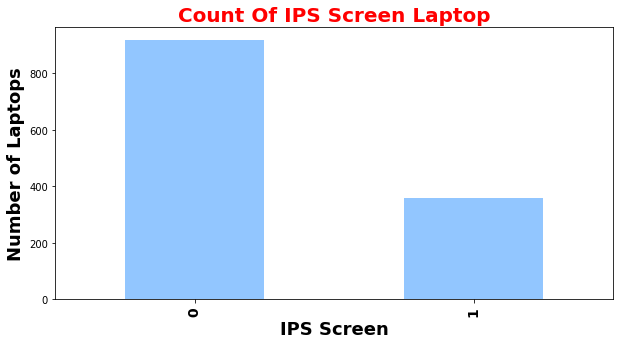

In [46]:
x['IPS'].value_counts().plot(kind='bar',figsize=(10,5))
plt.xlabel('IPS Screen',fontsize=18,fontweight='bold')
plt.ylabel('Number of Laptops',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14)
plt.title('Count Of IPS Screen Laptop',fontsize=20,fontweight='bold',color='red')

Text(0.5, 1.0, 'Price Vs IPS Screen')

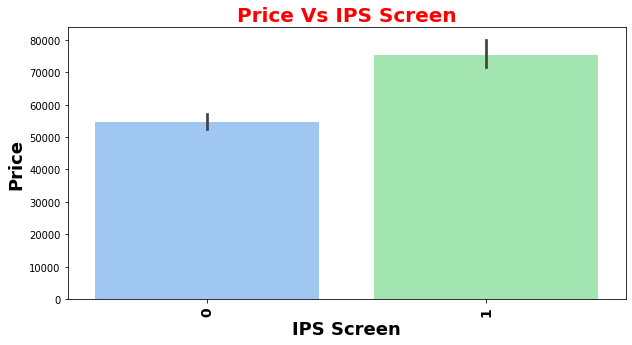

In [47]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(data=x,
           x='IPS',
           y='Price')
ax.set_xlabel('IPS Screen',fontsize=18,fontweight='bold')
ax.set_ylabel('Price',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14,rotation=90)
ax.set_title('Price Vs IPS Screen',fontsize=20,fontweight='bold',color='red')

In [48]:
resolution=x['ScreenResolution'].str.split('x',n=1,expand=True)

In [49]:
resolution_x=resolution[0]
resolution_y=resolution[1]

In [50]:
x['resolution_x']=resolution_x
x['resolution_y']=resolution_y

In [51]:
import re

In [52]:
def splitter(text):
    res = re.findall(r'\d+', text)
    return res

In [53]:
x['resolution_x']=x['resolution_x'].str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]).astype('int32')
x['resolution_y']=x['resolution_y'].astype('int32')

In [54]:
x.drop('ScreenResolution',axis=1,inplace=True)

In [55]:
x.corr()['Price']

Inches          0.066990
Ram             0.740106
Weight          0.212192
Price           1.000000
TouchScreen     0.188631
IPS             0.250358
resolution_x    0.552074
resolution_y    0.548111
Name: Price, dtype: float64

#### we can see that resolution_x and and resolution_y have same correlation. So this is multicolinearity we can drop one of them.

In [56]:
## We are going to calculate the ppi(pixel per inch)
x['ppi'] = (((x['resolution_x']**2) + (x['resolution_y']**2))**0.5/x['Inches']).astype('float')

Text(0.5, 1.0, 'Price Vs Pixel Per Inch(PPI)')

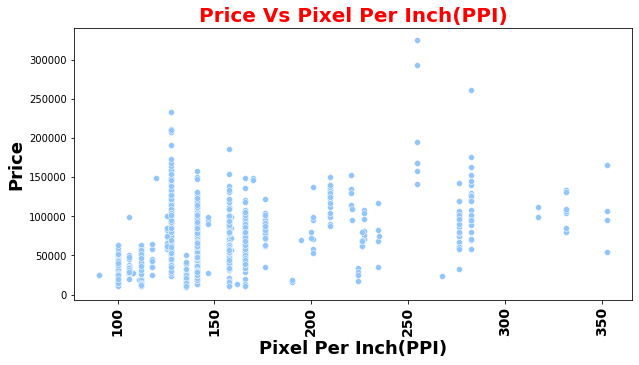

In [57]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.scatterplot(x=x['ppi'],
               y=x['Price'])
ax.set_xlabel('Pixel Per Inch(PPI)',fontsize=18,fontweight='bold')
ax.set_ylabel('Price',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14,rotation=90)
ax.set_title('Price Vs Pixel Per Inch(PPI)',fontsize=20,fontweight='bold',color='red')

In [58]:
x.head(2)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_processor,TouchScreen,IPS,resolution_x,resolution_y,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0,0,1440,900,127.677940


In [59]:
#### Now we can drop inches,resolution_x,resolution_y,Cpu
x.drop(['Inches','resolution_x','resolution_y','Cpu'],axis=1,inplace=True)

In [60]:
x.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_processor,TouchScreen,IPS,ppi
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,0,1,226.983005
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0,0,127.677940
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0,0,141.211998
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Intel Core i7,0,1,220.534624
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Intel Core i5,0,1,226.983005


#### Lets analyze Memory Column

In [61]:
def hdd(text):
    if 'HDD' in text:
        return text
    else:
        return 0
def flash(text):
    if 'Flash' in text:
        return text
    else:
        return 0
def Hybrid(text):
    if 'Hybrid' in text:
        return text
    else:
        return 0
def ssd(text):
    if 'SSD' in text:
        return text
    else:
        return 0


In [62]:
x["HDD"] = x['Memory'].apply(hdd)
x["SSD"] = x['Memory'].apply(ssd)
x["Hybrid_Storage"] = x['Memory'].apply(Hybrid)
x["Flash_Storage"] = x['Memory'].apply(flash)

In [63]:
x.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_processor,TouchScreen,IPS,ppi,HDD,SSD,Hybrid_Storage,Flash_Storage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5,0,1,226.983005,0,128GB SSD,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Intel Core i5,0,0,127.677940,0,0,0,128GB Flash Storage
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Intel Core i5,0,0,141.211998,0,256GB SSD,0,0


In [64]:
## For HDD

In [65]:
x['HDD']=x['HDD'].str.split(n=1,expand=True)[0]

In [66]:
x['HDD']=x['HDD'].str.replace('GB','')
x['HDD']=x['HDD'].str.replace('TB','')
x['HDD']=x['HDD'].fillna(0)

In [67]:
## For SSD

In [68]:
x['SSD']=x['SSD'].str.split(n=1,expand=True)[0]

In [69]:
x['SSD']=x['SSD'].str.replace('GB','')
x['SSD']=x['SSD'].str.replace('TB','')
x['SSD']=x['SSD'].fillna(0)

In [70]:
## For Flash

In [71]:
x['Flash_Storage']=x['Flash_Storage'].str.split(n=1,expand=True)[0]

In [72]:
x['Flash_Storage']=x['Flash_Storage'].str.replace('GB','')
x['Flash_Storage']=x['Flash_Storage'].str.replace('TB','')
x['Flash_Storage']=x['Flash_Storage'].fillna(0)

In [73]:
## For Hybrid

In [74]:
x['Hybrid_Storage']=x['Hybrid_Storage'].str.split(n=1,expand=True)[0]

In [75]:
x['Hybrid_Storage']=x['Hybrid_Storage'].str.replace('GB','')
x['Hybrid_Storage']=x['Hybrid_Storage'].str.replace('TB','')
x['Hybrid_Storage']=x['Hybrid_Storage'].fillna(0)

In [76]:
x.drop('Memory',axis=1,inplace=True)

In [77]:
np.where(x['Hybrid_Storage'] == 1.0)

(array([], dtype=int64),)

In [78]:
x['Hybrid_Storage'] = x['Hybrid_Storage'].astype(float)
x['Flash_Storage'] =  x['Flash_Storage'].astype(float)
x['HDD'] = x['HDD'].astype(float)
x['SSD'] = x['SSD'].astype(float)

In [79]:
x.dtypes

Company            object
TypeName           object
Ram                 int32
Gpu                object
OpSys              object
Weight            float64
Price             float64
cpu_processor      object
TouchScreen         int64
IPS                 int64
ppi               float64
HDD               float64
SSD               float64
Hybrid_Storage    float64
Flash_Storage     float64
dtype: object

In [80]:
## Lets Analyze GPU
x['Gpu'].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia GTX 980 SLI           1
Intel HD Graphics 540        1
AMD Radeon Pro 455           1
AMD Radeon R7 M360           1
AMD Radeon R7                1
Name: Gpu, Length: 110, dtype: int64

In [81]:
def gpu(text):
    if 'Intel' in text:
        return 'Intel'
    elif 'Nvidia' in text:
        return 'Nvidia'
    else:
        return 'AMD'

In [82]:
x['gpu']=x['Gpu'].apply(gpu)

In [83]:
x['gpu'].value_counts()

Intel     703
Nvidia    396
AMD       175
Name: gpu, dtype: int64

Text(0.5, 1.0, 'Count Of GPU')

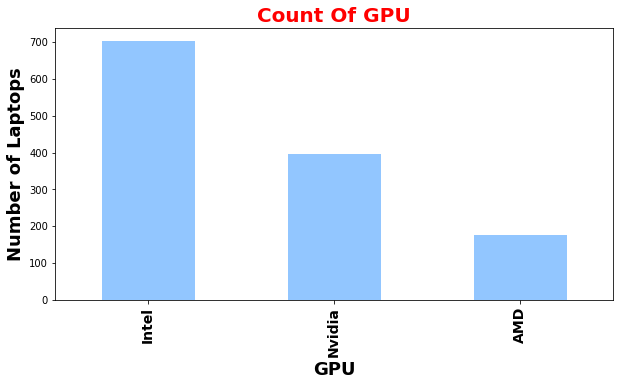

In [84]:
x['gpu'].value_counts().plot(kind='bar',figsize=(10,5))
plt.xlabel('GPU',fontsize=18,fontweight='bold')
plt.ylabel('Number of Laptops',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14)
plt.title('Count Of GPU',fontsize=20,fontweight='bold',color='red')

Text(0.5, 1.0, 'Price Vs GPU')

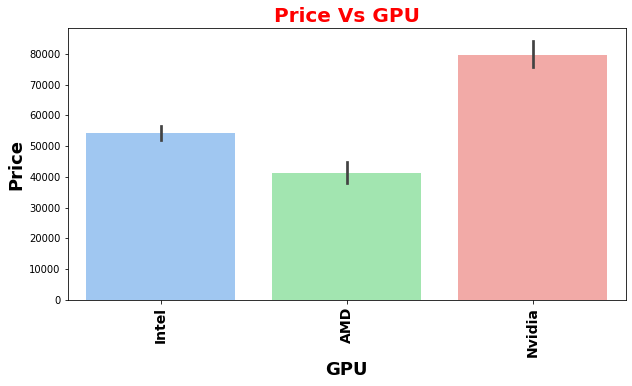

In [85]:
## Gpu Vs Price
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(data=x,
           x='gpu',
           y='Price')
ax.set_xlabel('GPU',fontsize=18,fontweight='bold')
ax.set_ylabel('Price',fontsize=18,fontweight='bold')
plt.xticks(fontweight='bold',fontsize=14,rotation=90)
ax.set_title('Price Vs GPU',fontsize=20,fontweight='bold',color='red')

In [86]:
x.drop('Gpu',axis=1,inplace=True)

In [87]:
x.head()

,Company,TypeName,Ram,OpSys,Weight,Price,cpu_processor,TouchScreen,IPS,ppi,HDD,SSD,Hybrid_Storage,Flash_Storage,gpu
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Intel Core i5,0,1,226.983005,0.0,128.0,0.0,0.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Intel Core i5,0,0,127.677940,0.0,0.0,0.0,128.0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,Intel Core i5,0,0,141.211998,0.0,256.0,0.0,0.0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,Intel Core i7,0,1,220.534624,0.0,512.0,0.0,0.0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,Intel Core i5,0,1,226.983005,0.0,256.0,0.0,0.0,Intel


## Correlation

In [88]:
corr=x.corr()

In [89]:
corr

,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Hybrid_Storage,Flash_Storage
Ram,1.000000,0.389658,0.740106,0.111378,0.201446,0.292964,0.002389,0.457478,0.084393,-0.056539
Weight,0.389658,1.000000,0.212192,-0.293933,0.022250,-0.320885,0.287708,-0.087586,0.098330,-0.177144
Price,0.740106,0.212192,1.000000,0.188631,0.250358,0.469539,-0.023379,0.550475,0.074346,-0.037176
TouchScreen,0.111378,-0.293933,0.188631,1.000000,0.139550,0.454189,-0.168537,0.207320,-0.019563,-0.017394
IPS,0.201446,0.022250,0.250358,0.139550,1.000000,0.290634,-0.095343,0.210547,0.033332,0.073745
ppi,0.292964,-0.320885,0.469539,0.454189,0.290634,1.000000,-0.221426,0.407088,-0.028132,0.080978
HDD,0.002389,0.287708,-0.023379,-0.168537,-0.095343,-0.221426,1.000000,-0.193941,-0.023742,-0.074026
SSD,0.457478,-0.087586,0.550475,0.207320,0.210547,0.407088,-0.193941,1.000000,0.024211,-0.158607
Hybrid_Storage,0.084393,0.098330,0.074346,-0.019563,0.033332,-0.028132,-0.023742,0.024211,1.000000,-0.006953
Flash_Storage,-0.056539,-0.177144,-0.037176,-0.017394,0.073745,0.080978,-0.074026,-0.158607,-0.006953,1.000000


In [90]:
corr['Price']

Ram               0.740106
Weight            0.212192
Price             1.000000
TouchScreen       0.188631
IPS               0.250358
ppi               0.469539
HDD              -0.023379
SSD               0.550475
Hybrid_Storage    0.074346
Flash_Storage    -0.037176
Name: Price, dtype: float64

In [91]:
## we can drop Hybrid and Flash_Stroage column
x.drop(['Hybrid_Storage','Flash_Storage'],axis=1,inplace = True)

Text(0.5, 1.0, 'Correlation Heatmap')

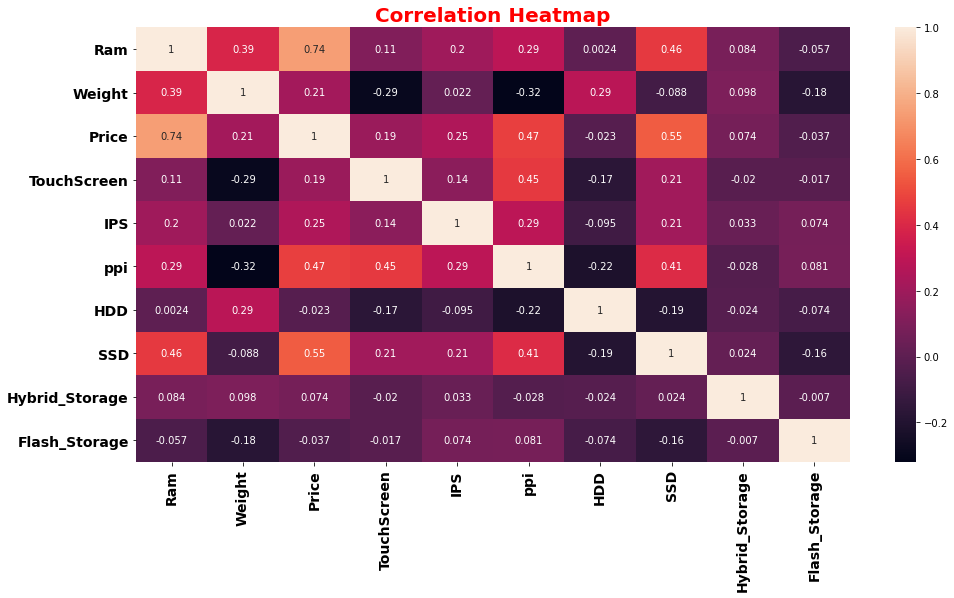

In [92]:
fig,ax=plt.subplots(figsize=(16,8))
ax=sns.heatmap(data=corr,annot=True)
plt.xticks(fontweight='bold',fontsize=14,rotation=90)
plt.yticks(fontweight='bold',fontsize=14)
ax.set_title('Correlation Heatmap',fontsize=20,fontweight='bold',color='red')

<AxesSubplot:xlabel='Price', ylabel='Density'>

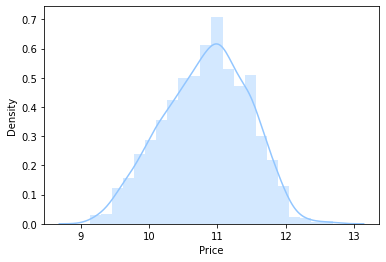

In [93]:
sns.distplot(np.log(x['Price']))

## Model Building

In [94]:
## Separating Dependent and Independent feature
X = x.drop('Price',axis=1)
Y = np.log(x['Price'])

In [95]:
from sklearn.linear_model import  Ridge, Lasso, LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,  AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [96]:
x.head(3)

,Company,TypeName,Ram,OpSys,Weight,Price,cpu_processor,TouchScreen,IPS,ppi,HDD,SSD,gpu
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Intel Core i5,0,1,226.983005,0.0,128.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Intel Core i5,0,0,127.677940,0.0,0.0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,Intel Core i5,0,0,141.211998,0.0,256.0,Intel


In [97]:
X.head()

,Company,TypeName,Ram,OpSys,Weight,cpu_processor,TouchScreen,IPS,ppi,HDD,SSD,gpu
0,Apple,Ultrabook,8,macOS,1.37,Intel Core i5,0,1,226.983005,0.0,128.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,Intel Core i5,0,0,127.677940,0.0,0.0,Intel
2,HP,Notebook,8,No OS,1.86,Intel Core i5,0,0,141.211998,0.0,256.0,Intel
3,Apple,Ultrabook,16,macOS,1.83,Intel Core i7,0,1,220.534624,0.0,512.0,AMD
4,Apple,Ultrabook,8,macOS,1.37,Intel Core i5,0,1,226.983005,0.0,256.0,Intel


In [98]:
## Train-Test Splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [99]:
def predict(model):
    # Define Models Name
    print('Model: {}'.format(model))
    step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,5,11])
                                            ],remainder='passthrough')

    step2 = model

    pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
    ])

    pipe.fit(x_train,y_train)

    y_pred = pipe.predict(x_test)
    print('R2 score',r2_score(y_test,y_pred))
    print('MAE',mean_absolute_error(y_test,y_pred))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
    
    sns.distplot(y_test-y_pred)

Model: LinearRegression()
R2 score 0.8212935594821207
MAE 0.20298263418964593
RMSE:0.2598841871237953


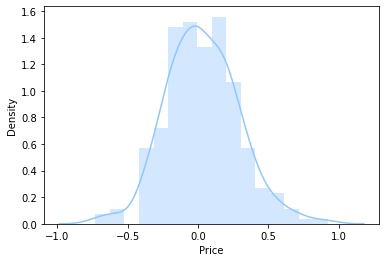

In [100]:
predict(LinearRegression())

Model: Ridge()
R2 score 0.823722302057167
MAE 0.20186715637256047
RMSE:0.2581121439113869


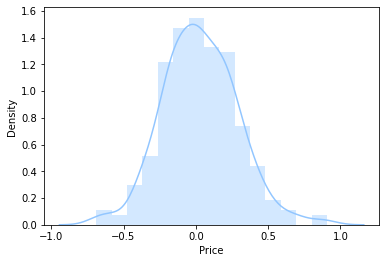

In [101]:
predict(Ridge())

Model: Lasso()
R2 score 0.44587076033244777
MAE 0.3515241110261957
RMSE:0.45763084255256087


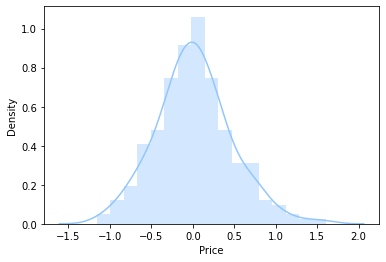

In [102]:
predict(Lasso())

Model: SGDRegressor()
R2 score -2.0113621515890736e+27
MAE 22104779044240.0
RMSE:27571150556587.855


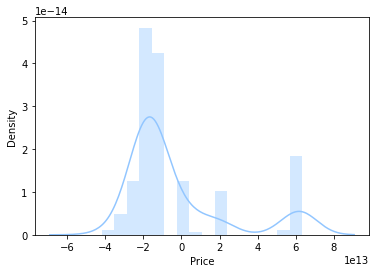

In [103]:
predict(SGDRegressor())

Model: KNeighborsRegressor()
R2 score 0.8089584194187378
MAE 0.20729911242188656
RMSE:0.26870373566862565


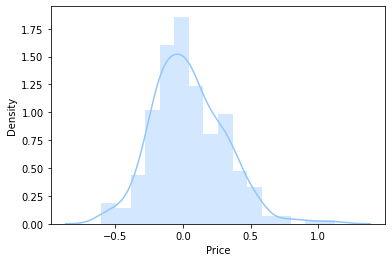

In [104]:
predict(KNeighborsRegressor())

Model: DecisionTreeRegressor()
R2 score 0.7866418972119513
MAE 0.20183911543474567
RMSE:0.28396467888123345


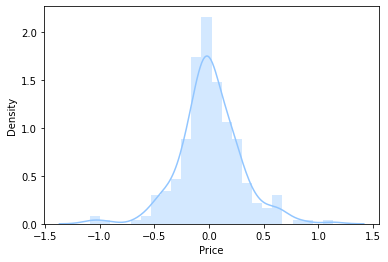

In [105]:
predict(DecisionTreeRegressor())

Model: GradientBoostingRegressor()
R2 score 0.859502276321531
MAE 0.18449063134208576
RMSE:0.2304328530318536


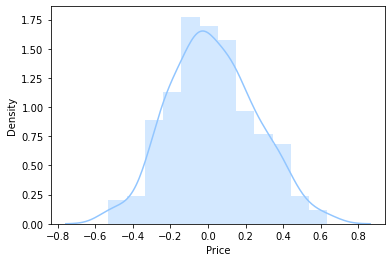

In [106]:
predict(GradientBoostingRegressor())

Model: RandomForestRegressor()
R2 score 0.882785625918184
MAE 0.15933688777420693
RMSE:0.21047484064310765


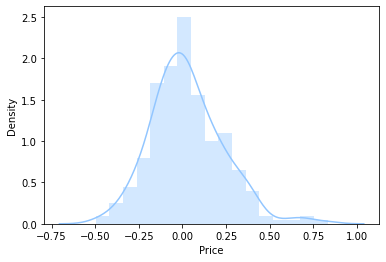

In [107]:
predict(RandomForestRegressor())

Model: AdaBoostRegressor()
R2 score 0.8072018943362267
MAE 0.2213523708708452
RMSE:0.2699362026978602


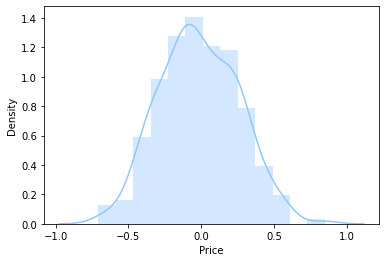

In [108]:
predict(AdaBoostRegressor())

Model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
R2 score 0.8619670963996867
MAE 0.1721272162031587
RMSE:0.22840261129784567


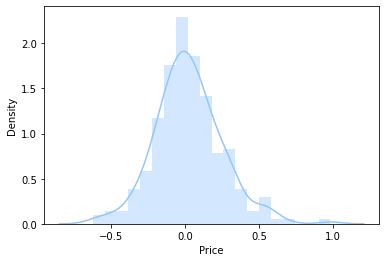

In [109]:
predict(XGBRegressor())

Model: XGBRFRegressor(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bytree=None, gamma=None, gpu_id=None,
               importance_type='gain', interaction_constraints=None,
               max_delta_step=None, max_depth=None, min_child_weight=None,
               missing=nan, monotone_constraints=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', random_state=None, reg_alpha=None,
               scale_pos_weight=None, tree_method=None,
               validate_parameters=None, verbosity=None)
R2 score 0.8395544391424469
MAE 0.1939260545367937
RMSE:0.24624850687465488


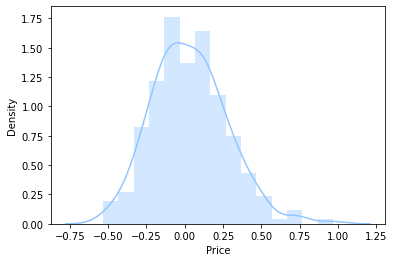

In [110]:
predict(XGBRFRegressor())

Model: <catboost.core.CatBoostRegressor object at 0x0000026699077970>
Learning rate set to 0.039161
0:	learn: 0.6045510	total: 513ms	remaining: 8m 32s
1:	learn: 0.5905312	total: 516ms	remaining: 4m 17s
2:	learn: 0.5769187	total: 517ms	remaining: 2m 51s
3:	learn: 0.5630472	total: 521ms	remaining: 2m 9s
4:	learn: 0.5496805	total: 523ms	remaining: 1m 44s
5:	learn: 0.5363842	total: 525ms	remaining: 1m 26s
6:	learn: 0.5239366	total: 527ms	remaining: 1m 14s
7:	learn: 0.5127054	total: 530ms	remaining: 1m 5s
8:	learn: 0.5006795	total: 532ms	remaining: 58.6s
9:	learn: 0.4896160	total: 534ms	remaining: 52.9s
10:	learn: 0.4797487	total: 536ms	remaining: 48.2s
11:	learn: 0.4703309	total: 539ms	remaining: 44.3s
12:	learn: 0.4606341	total: 540ms	remaining: 41s
13:	learn: 0.4517968	total: 543ms	remaining: 38.2s
14:	learn: 0.4419147	total: 546ms	remaining: 35.9s
15:	learn: 0.4331128	total: 549ms	remaining: 33.8s
16:	learn: 0.4259528	total: 551ms	remaining: 31.9s
17:	learn: 0.4185934	total: 553ms	remai

206:	learn: 0.1929243	total: 967ms	remaining: 3.71s
207:	learn: 0.1927102	total: 970ms	remaining: 3.69s
208:	learn: 0.1926243	total: 972ms	remaining: 3.68s
209:	learn: 0.1924150	total: 974ms	remaining: 3.67s
210:	learn: 0.1923019	total: 976ms	remaining: 3.65s
211:	learn: 0.1921563	total: 978ms	remaining: 3.64s
212:	learn: 0.1918810	total: 980ms	remaining: 3.62s
213:	learn: 0.1915848	total: 982ms	remaining: 3.61s
214:	learn: 0.1914590	total: 985ms	remaining: 3.6s
215:	learn: 0.1912427	total: 987ms	remaining: 3.58s
216:	learn: 0.1910347	total: 990ms	remaining: 3.57s
217:	learn: 0.1909231	total: 991ms	remaining: 3.56s
218:	learn: 0.1906998	total: 993ms	remaining: 3.54s
219:	learn: 0.1905629	total: 995ms	remaining: 3.53s
220:	learn: 0.1901574	total: 997ms	remaining: 3.52s
221:	learn: 0.1900114	total: 999ms	remaining: 3.5s
222:	learn: 0.1898934	total: 1s	remaining: 3.49s
223:	learn: 0.1897711	total: 1s	remaining: 3.48s
224:	learn: 0.1896378	total: 1.01s	remaining: 3.47s
225:	learn: 0.189508

407:	learn: 0.1591191	total: 1.42s	remaining: 2.07s
408:	learn: 0.1590264	total: 1.43s	remaining: 2.06s
409:	learn: 0.1589453	total: 1.43s	remaining: 2.06s
410:	learn: 0.1587667	total: 1.43s	remaining: 2.05s
411:	learn: 0.1586877	total: 1.43s	remaining: 2.04s
412:	learn: 0.1585855	total: 1.43s	remaining: 2.04s
413:	learn: 0.1584177	total: 1.44s	remaining: 2.03s
414:	learn: 0.1582051	total: 1.44s	remaining: 2.03s
415:	learn: 0.1580973	total: 1.44s	remaining: 2.02s
416:	learn: 0.1579038	total: 1.44s	remaining: 2.02s
417:	learn: 0.1577160	total: 1.45s	remaining: 2.01s
418:	learn: 0.1577049	total: 1.45s	remaining: 2.01s
419:	learn: 0.1574239	total: 1.45s	remaining: 2s
420:	learn: 0.1572175	total: 1.45s	remaining: 2s
421:	learn: 0.1569105	total: 1.46s	remaining: 1.99s
422:	learn: 0.1568573	total: 1.46s	remaining: 1.99s
423:	learn: 0.1564951	total: 1.46s	remaining: 1.98s
424:	learn: 0.1563188	total: 1.46s	remaining: 1.98s
425:	learn: 0.1562021	total: 1.46s	remaining: 1.97s
426:	learn: 0.1561

621:	learn: 0.1360953	total: 1.89s	remaining: 1.15s
622:	learn: 0.1359866	total: 1.9s	remaining: 1.15s
623:	learn: 0.1359511	total: 1.9s	remaining: 1.14s
624:	learn: 0.1359271	total: 1.9s	remaining: 1.14s
625:	learn: 0.1358924	total: 1.91s	remaining: 1.14s
626:	learn: 0.1357581	total: 1.91s	remaining: 1.14s
627:	learn: 0.1356628	total: 1.91s	remaining: 1.13s
628:	learn: 0.1356292	total: 1.91s	remaining: 1.13s
629:	learn: 0.1355597	total: 1.91s	remaining: 1.12s
630:	learn: 0.1355014	total: 1.92s	remaining: 1.12s
631:	learn: 0.1354412	total: 1.92s	remaining: 1.12s
632:	learn: 0.1354311	total: 1.92s	remaining: 1.11s
633:	learn: 0.1354053	total: 1.92s	remaining: 1.11s
634:	learn: 0.1352812	total: 1.93s	remaining: 1.11s
635:	learn: 0.1351997	total: 1.93s	remaining: 1.1s
636:	learn: 0.1350694	total: 1.93s	remaining: 1.1s
637:	learn: 0.1349899	total: 1.93s	remaining: 1.1s
638:	learn: 0.1349287	total: 1.94s	remaining: 1.09s
639:	learn: 0.1348816	total: 1.94s	remaining: 1.09s
640:	learn: 0.1347

828:	learn: 0.1220120	total: 2.36s	remaining: 488ms
829:	learn: 0.1219551	total: 2.37s	remaining: 485ms
830:	learn: 0.1219135	total: 2.37s	remaining: 482ms
831:	learn: 0.1218409	total: 2.37s	remaining: 479ms
832:	learn: 0.1217543	total: 2.37s	remaining: 476ms
833:	learn: 0.1216796	total: 2.38s	remaining: 473ms
834:	learn: 0.1216327	total: 2.38s	remaining: 470ms
835:	learn: 0.1215695	total: 2.38s	remaining: 467ms
836:	learn: 0.1214921	total: 2.38s	remaining: 464ms
837:	learn: 0.1214454	total: 2.38s	remaining: 461ms
838:	learn: 0.1213942	total: 2.38s	remaining: 458ms
839:	learn: 0.1213379	total: 2.39s	remaining: 455ms
840:	learn: 0.1212655	total: 2.39s	remaining: 452ms
841:	learn: 0.1212283	total: 2.39s	remaining: 449ms
842:	learn: 0.1211605	total: 2.39s	remaining: 446ms
843:	learn: 0.1211316	total: 2.4s	remaining: 443ms
844:	learn: 0.1210606	total: 2.4s	remaining: 440ms
845:	learn: 0.1210109	total: 2.4s	remaining: 437ms
846:	learn: 0.1209696	total: 2.4s	remaining: 434ms
847:	learn: 0.12

R2 score 0.8837392483459613
MAE 0.1606658975119032
RMSE:0.20961691073425948


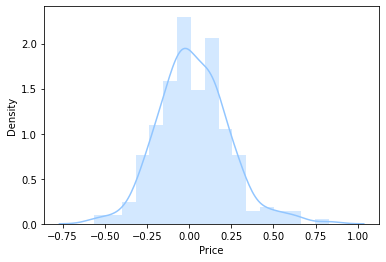

In [111]:
predict(CatBoostRegressor())

Model: SVR()
R2 score 0.6272639907498248
MAE 0.29105265924692836
RMSE:0.3753275366969627


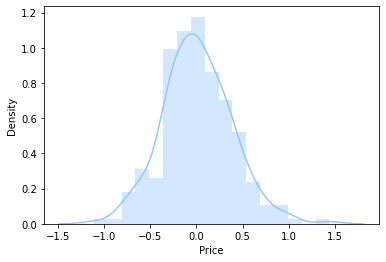

In [112]:
predict(SVR())

Model: LGBMRegressor()
R2 score 0.8850102356085726
MAE 0.162838676871086
RMSE:0.2084679736748708


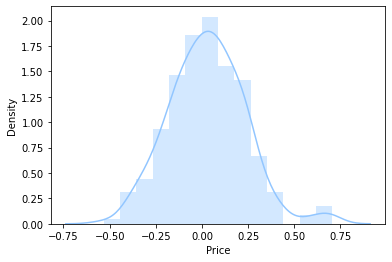

In [113]:
predict(LGBMRegressor())

#### we can see that LGBM regressor is performing well with:
- r2 score: 0.8850102356085726
- MAE:0.162838676871086
- RMSE:0.2084679736748708

R2 score 0.8850102356085726
MAE 0.162838676871086
RMSE:0.2084679736748708


<AxesSubplot:xlabel='Price', ylabel='Density'>

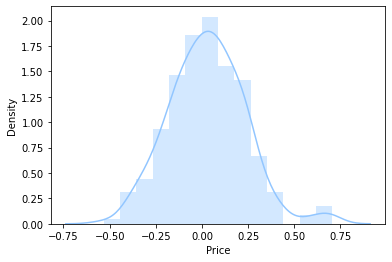

In [114]:
step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,5,11])
                                            ],remainder='passthrough')

step2 = LGBMRegressor()

model = Pipeline([
    ('step1',step1),
    ('step2',step2)
    ])

model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
    
sns.distplot(y_test-y_pred)

In [115]:
import pickle
pickle.dump(x,open('data.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))